In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/DS Practice - Mohamed Ayman Mohamed  - 900182267/Case Studies/House Prediction Case Study/train.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/DS Practice - Mohamed Ayman Mohamed  - 900182267/Case Studies/House Prediction Case Study/test.csv')

In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/DS Practice - Mohamed Ayman Mohamed  - 900182267/Case Studies/House Prediction Case Study/sample_submission.csv')
df_test['SalePrice'] = df_test.Id.map(y_test.set_index('Id')['SalePrice'])


## 0. Understanding The meaning of the features
### I read it from this link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt


## 1. Understanding The Data
### I will take a look in the training data first. Then, I will need to do some imputations in the NANs in the testing data. More illustratively, I just need to fill in the missing values in the test data only. I need to be blind in terms of the information that the test data gives.

In [ ]:
def UnderstandingTheData(dataFrame):
  print(dataFrame.shape)
  print(dataFrame)
  print(dataFrame.info())
  print(dataFrame.isnull().sum())
  print(dataFrame.describe().T)

In [ ]:
UnderstandingTheData(df_train)

(1460, 81)
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 co

In [ ]:
UnderstandingTheData(df_test)

(1459, 81)
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition      SalePrice
0     1461          20       RH  ...        WD         Normal  169277.052498
1     1462          20       RL  ...        WD         Normal  187758.393989
2     1463          60       RL  ...        WD         Normal  183583.683570
3     1464          60       RL  ...        WD         Normal  179317.477511
4     1465         120       RL  ...        WD         Normal  150730.079977
...    ...         ...      ...  ...       ...            ...            ...
1454  2915         160       RM  ...        WD         Normal  167081.220949
1455  2916         160       RM  ...        WD        Abnorml  164788.778231
1456  2917          20       RL  ...        WD        Abnorml  219222.423400
1457  2918          85       RL  ...        WD         Normal  184924.279659
1458  2919          60       RL  ...        WD         Normal  187741.866657

[1459 rows x 81 columns]
<class 'pandas.core.frame.DataFrame'>
R

In [ ]:
# correlation coefficient of each variable
corr = df_train.corr()

# correlation coefficent between predictor variables and 'SalePrice'
corr_target = corr['SalePrice']

# show the correlation coefficent between predictor variables and 'SalePrice'
corr_target.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### 1.1 Check Whether the Test and the Train features are the same

In [ ]:
train_features = df_train.columns
test_features = df_test.columns 
sameFeatures = True
for i in range(80):
    if(train_features[i] != test_features[i]):
        sameFeatures = False 
        break

if(sameFeatures):
    print("They have the same features")
        

They have the same features


### 1.2 Look Deeper in the missing values

In [ ]:
df_train.isnull().sum().sum()

6965

In [ ]:
miss_data = df_train.isnull().sum().sort_values(ascending = False)
miss_Data = pd.DataFrame(miss_data)[:19]
miss_Data


0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1

##### We can notice from above that there are 19 features having missing values. We need to take into consideration each feature and see whether we will need to drop it or impute it.

In [ ]:
# Make Sure that The Sales Price values is making sense 

df_train['SalePrice'].describe()
# Minimum is quite reasonable, not (0 for example). In this sense, we do not need to do anything here

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 1.3 Data Visualization to the features having missing Values

In [ ]:
miss_Data
cols = miss_Data.index

In [ ]:
df_copy = df_train.copy()

from sklearn import preprocessing
def convertingToLabel(feature):
  le = preprocessing.LabelEncoder()
  le.fit(df_copy[feature])
  df_copy[feature] = le.transform(df_copy[feature])

In [ ]:
# if it is categorical, do label encoding

for feature in cols: 
  if df_copy[feature].dtypes == 'object':
    df_copy[feature].fillna('0',inplace=True)
    convertingToLabel(feature)

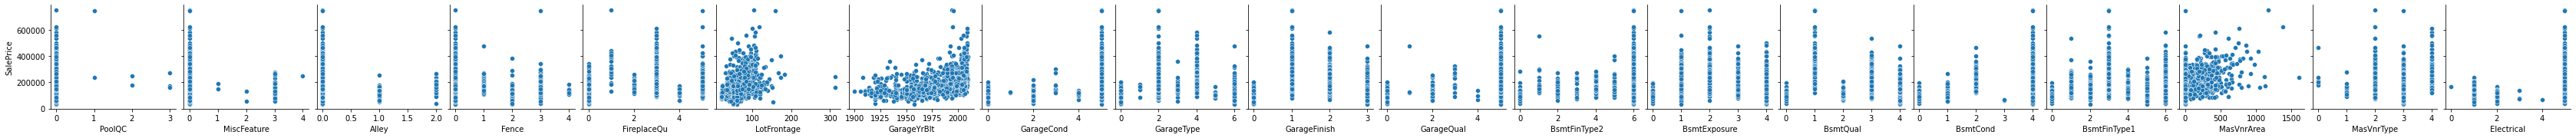

In [ ]:
sns.pairplot(
    df_copy,
    x_vars=cols,
    y_vars=['SalePrice'],
)

#### 1.3.1 Check the Correlation between PoolQC vs SalePrice

PoolQC: Pool quality
		
1.       Ex	Excellent
2.       Gd	Good
3.       Fa	Fair
4.       NA	No Pool

##### Now, we can see that more of the data does not have a pool (1453 examples out of 1460). This will make a huge bias in the data, so we need to delete it. We need first to see the correlation with respect to the `ground truth`

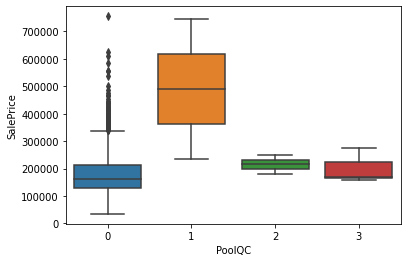

In [ ]:
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = df_copy)
# plt.ylim(0,300000)
# 0 means there is no PoolQC

##### **Conclusion**: 
##### we can notice that from the pairPlot and boxPlot it is better to delete the PoolQC feature, as we have only 7 examples of other possibilities. Yes, there is a distinction in terms of price of each categorical value. However, the number of examples to depend on other than the NA value is very small. In this sense, there is no need to this feature to avoid any bias in the model while training. 

#### 1.3.2 Check the Correlation between MiscFeature vs SalePrice

(0.0, 350000.0)

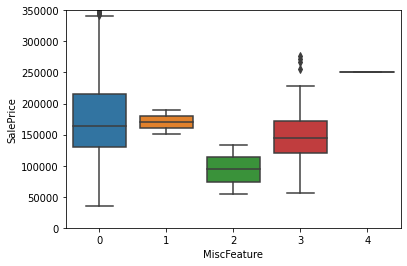

In [ ]:
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = df_copy)
plt.ylim(0,350000)
# 0 means there is no MiscFeature

##### **Conclusion**: 
##### Similar to MiscFeature feature, we need to delete this feature, as the majority of the data mentions NA with the training examples. In this sense, it is better to delete this feature to avoid any sort of bias in the data.NA means there is no MiscFeature in the house.

#### 1.3.3 Check the Correlation between Alley vs SalePrice

(0.0, 350000.0)

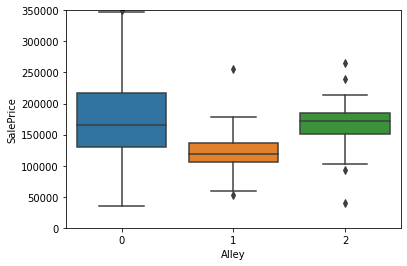

In [ ]:
sns.boxplot(x = 'Alley', y = 'SalePrice', data = df_copy)
plt.ylim(0,350000)
# 0 means there is no Alley

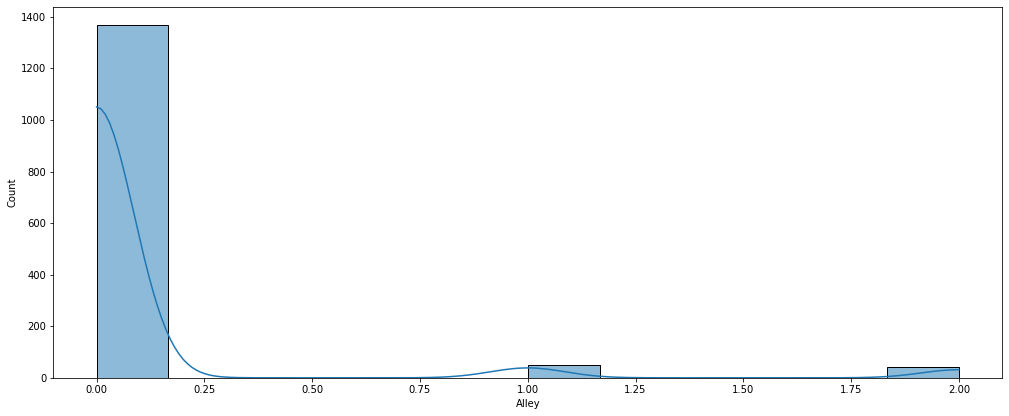

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(df_copy['Alley'], ax=ax1, kde=True)

##### **Conclusion**: 
##### We can notice from pairPlot, Histogram, and box plot that there is a mere relationship between SalePrice and Alley, but we do not know whether will rely on it or not. In this sense, I will need to train the model with it and without it, and, then, we will see how this feature affect on the prediction. It is worth mentioning that NA means that there is no alley according to the description

#### 1.3.4 Check the Correlation between Fence vs SalePrice

(0.0, 350000.0)

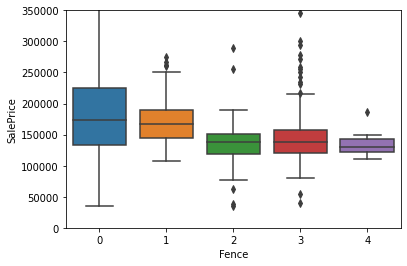

In [ ]:
sns.boxplot(x = 'Fence', y = 'SalePrice', data = df_copy)
plt.ylim(0,350000)
# 0 means there is no Fence

##### **Conclusion**: 
##### We can notice from pairPlot, and box plot that Fence does not make any difference whether it is NA(4) or any other ones- The center for each categorical value is nearly the same. In this sense, I am claiming that it is better to remove Fence Feature

#### 1.3.5 Check the Correlation between FirePlaceQu vs SalePrice

(0.0, 500000.0)

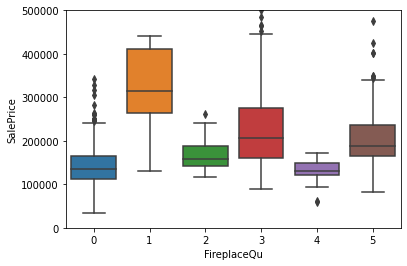

In [ ]:
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)
# 0 means there is no FirePlaceQu

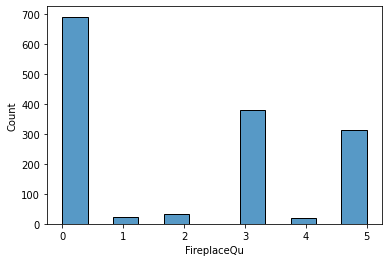

In [ ]:
sns.histplot(df_copy['FireplaceQu'])

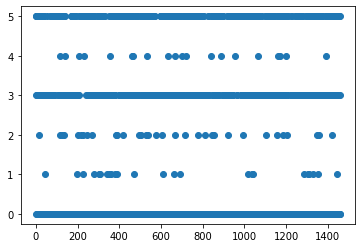

In [ ]:
plt.scatter((range(len(df_copy))), df_copy['FireplaceQu'])

##### **Conclusion**: 
##### We can notice from pairPlot, scatterPlot, and box plot that categorical values 1 and 3 have insufficient number of examples. Regarding the other categorical values, we can see that it affects on the Sale Price drastically. It preferred to being included. It is worth mentioning that NA means "no Fire Place" 

#### 1.3.6 Check the Correlation between LotFrontage vs SalePrice



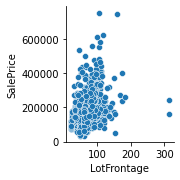

In [ ]:
sns.pairplot(
    df_copy,
    x_vars=['LotFrontage'],
    y_vars=['SalePrice'],
)


##### **Conclusion**: 
##### We can notice from pairPlot that there is a relationship between SalePrice and LotFrontage. There is some outliers. Is the correlation strong enough? We need to compare its correlation with the others.

#### 1.3.7 Check the Correlation between GarageYrBlt vs SalePrice



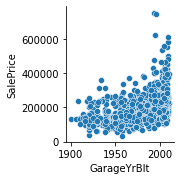

In [ ]:
sns.pairplot(
    df_copy,
    x_vars=['GarageYrBlt'],
    y_vars=['SalePrice'],
)


##### Conclusion: 
##### Now, there is non-linear relationship between SalePrice and GarageYrBit. In this sense, we need to impute the missing values. For simplicity, I will impute it with the mean

#### 1.3.8 Check the Correlation between Electrical vs SalePrice


(0.0, 550000.0)

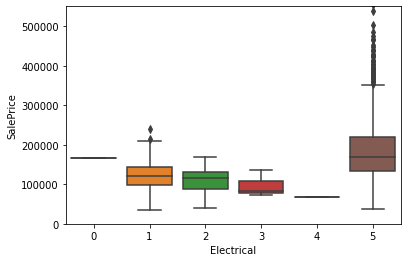

In [ ]:
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = df_copy)
plt.ylim(0,550000)


##### Conclusion: 
##### We can notice that Electircal has an effect on the SalePrice. I will keep it for now. Regarding the missing Values, since only one entry in the whole column, I will draw this example.

#### 1.3.8 Check the Correlation between Garage vs SalePrice


(0.0, 400000.0)

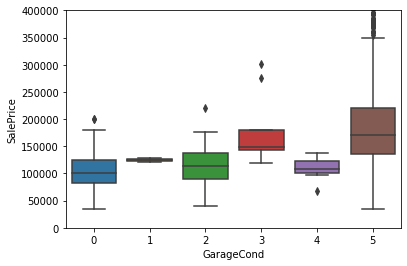

In [ ]:
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df_copy)
plt.ylim(0,400000)

# 5 there is no Garage

(0.0, 500000.0)

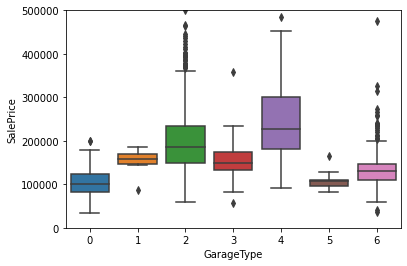

In [ ]:
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)
# 5 there is no Garage

(0.0, 500000.0)

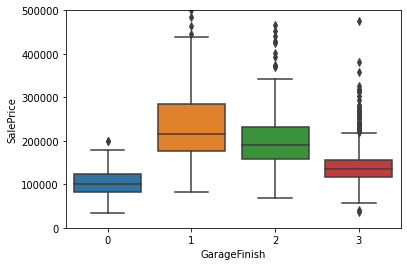

In [ ]:
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)
# 5 there is no Garage

(0.0, 500000.0)

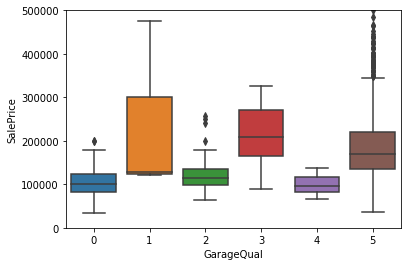

In [ ]:
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)
# 5 there is no Garage

##### Conclusion: 
##### We can notice that Garage has an effect on the SalePrice. I will keep it for now. I will need to check its strength of correlation with respect to the price in general after handling the missing values

#### 1.3.9 Check the Correlation between Basement vs SalePrice


(0.0, 500000.0)

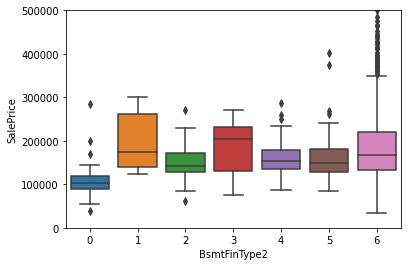

In [ ]:
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)
# 5 there is no Garage

(0.0, 500000.0)

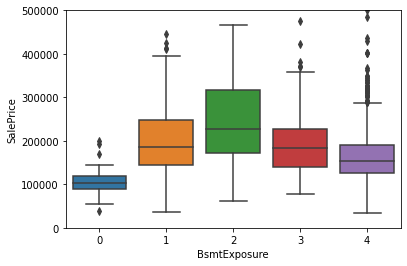

In [ ]:
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)

(0.0, 500000.0)

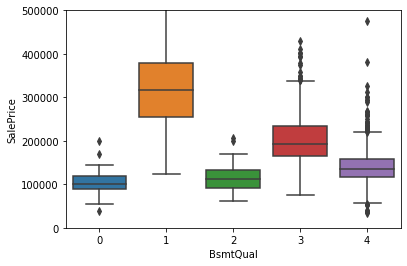

In [ ]:
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)

(0.0, 500000.0)

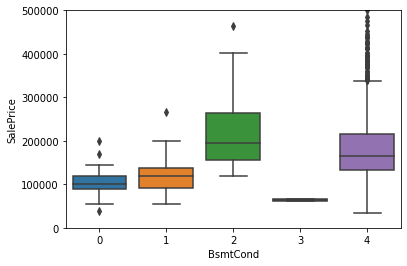

In [ ]:
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)

(0.0, 500000.0)

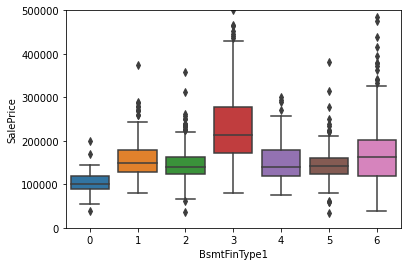

In [ ]:
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)

##### Conclusion: 
##### We can notice that Basement has an effect on the SalePrice [not all of them- type 2 does not have much effect]. I will keep it for now. I will need to check its strength of correlation with respect to the price in general after handling the missing values

#### 1.3.10 Check the Correlation between  Masonry veneer  vs SalePrice


(0.0, 500000.0)

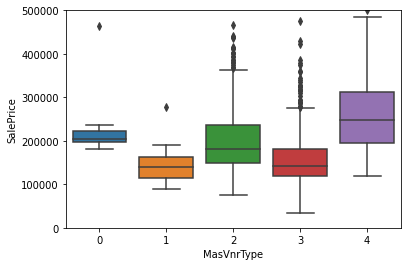

In [ ]:
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df_copy)
plt.ylim(0,500000)

##### Conclusion: 
##### We can notice that Masnory Veneer has a great effect on the price- type and Area. In this sense, I will keep it.

## 2. Handling missing Values
#### Now, we agreed on deleting PoolQC and MiscFeature features.Not only this, but I will add mean to the continous data. Moreover, I will need to delete the example having missing values with electircal features. Then, I will need to do more analyses

In [ ]:
df_copy = df_train.copy()

In [ ]:
df_copy.drop('PoolQC', inplace = True, axis = 1)
df_copy.drop('MiscFeature', inplace = True, axis = 1)
df_test.drop('PoolQC', inplace = True, axis = 1)
df_test.drop('MiscFeature', inplace = True, axis = 1)

In [ ]:
df_copy["Alley"] = df_copy["Alley"].fillna("None")
df_copy["Fence"] = df_copy["Fence"].fillna("None")
df_copy["FireplaceQu"] = df_copy["FireplaceQu"].fillna("None")


In [ ]:
df_test["Alley"] = df_test["Alley"].fillna("None")
df_test["Fence"] = df_test["Fence"].fillna("None")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("None")


In [ ]:
def check():
  miss_data = df_copy.isnull().sum().sort_values(ascending = False)
  miss_Data = pd.DataFrame(miss_data)[:19]
  return miss_Data
check()

0
LotFrontage   259
GarageType     81
GarageYrBlt    81
GarageFinish   81
GarageQual     81
GarageCond     81
BsmtFinType2   38
BsmtExposure   38
BsmtQual       37
BsmtCond       37
BsmtFinType1   37
MasVnrType      8
MasVnrArea      8
Electrical      1
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0

In [ ]:
numerical = df_copy.dtypes[df_copy.dtypes != 'object'].index


In [ ]:
numeric = {}
for feature in numerical:
  numeric[feature] = True

for feature in df_copy.columns:
  if(feature in numeric):
    continue
  numeric[feature] = False

In [ ]:
cols = df_copy.columns
numericalFeatures = []
categoricalFeatures = []
for feature in cols:
  if df_copy[feature].isnull().sum() ==0:
    continue
  if numeric[feature] == True:
    numericalFeatures.append(feature)
  else:
    categoricalFeatures.append(feature)

In [ ]:
def fillMissingValues(df):
  df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
  for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
  for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
  for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
  df["MasVnrType"] = df["MasVnrType"].fillna("None")
  df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
  df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
  df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [ ]:
fillMissingValues(df_copy)
fillMissingValues(df_test)

In [ ]:
# # I will do knn imputation on Knn Features for continous features
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_copy.loc[:,numericalFeatures] = imputer.fit_transform(df_copy.loc[:,numericalFeatures])

In [ ]:
check()

0
Id            0
HalfBath      0
FireplaceQu   0
Fireplaces    0
Functional    0
TotRmsAbvGrd  0
KitchenQual   0
KitchenAbvGr  0
BedroomAbvGr  0
FullBath      0
GarageYrBlt   0
BsmtHalfBath  0
BsmtFullBath  0
GrLivArea     0
LowQualFinSF  0
2ndFlrSF      0
1stFlrSF      0
Electrical    0
GarageType    0

In [ ]:
df_test["Functional"] = df_test["Functional"].fillna("Typ")
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])


In [ ]:
miss_data = df_test.isnull().sum().sort_values(ascending = False)
miss_Data = pd.DataFrame(miss_data)[:19]
miss_Data

0
Utilities     2
Id            0
HalfBath      0
FireplaceQu   0
Fireplaces    0
Functional    0
TotRmsAbvGrd  0
KitchenQual   0
KitchenAbvGr  0
BedroomAbvGr  0
FullBath      0
GarageYrBlt   0
BsmtHalfBath  0
BsmtFullBath  0
GrLivArea     0
LowQualFinSF  0
2ndFlrSF      0
1stFlrSF      0
Electrical    0

In [ ]:
df_test.drop('Utilities', inplace = True, axis = 1)
df_copy.drop('Utilities', inplace = True, axis = 1)

## 3. Data Visualization, Data Wrangling, and Feature Engineering

### 3.1 Check The Skewness and Kurtosis between all features

In [ ]:
m_df = df_copy.copy()

for feature in df_copy.columns: 
  if df_copy[feature].dtypes == 'object':
    df_copy[feature].fillna('0',inplace=True)
    convertingToLabel(feature)

In [ ]:
df_copy.shape

(1460, 78)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

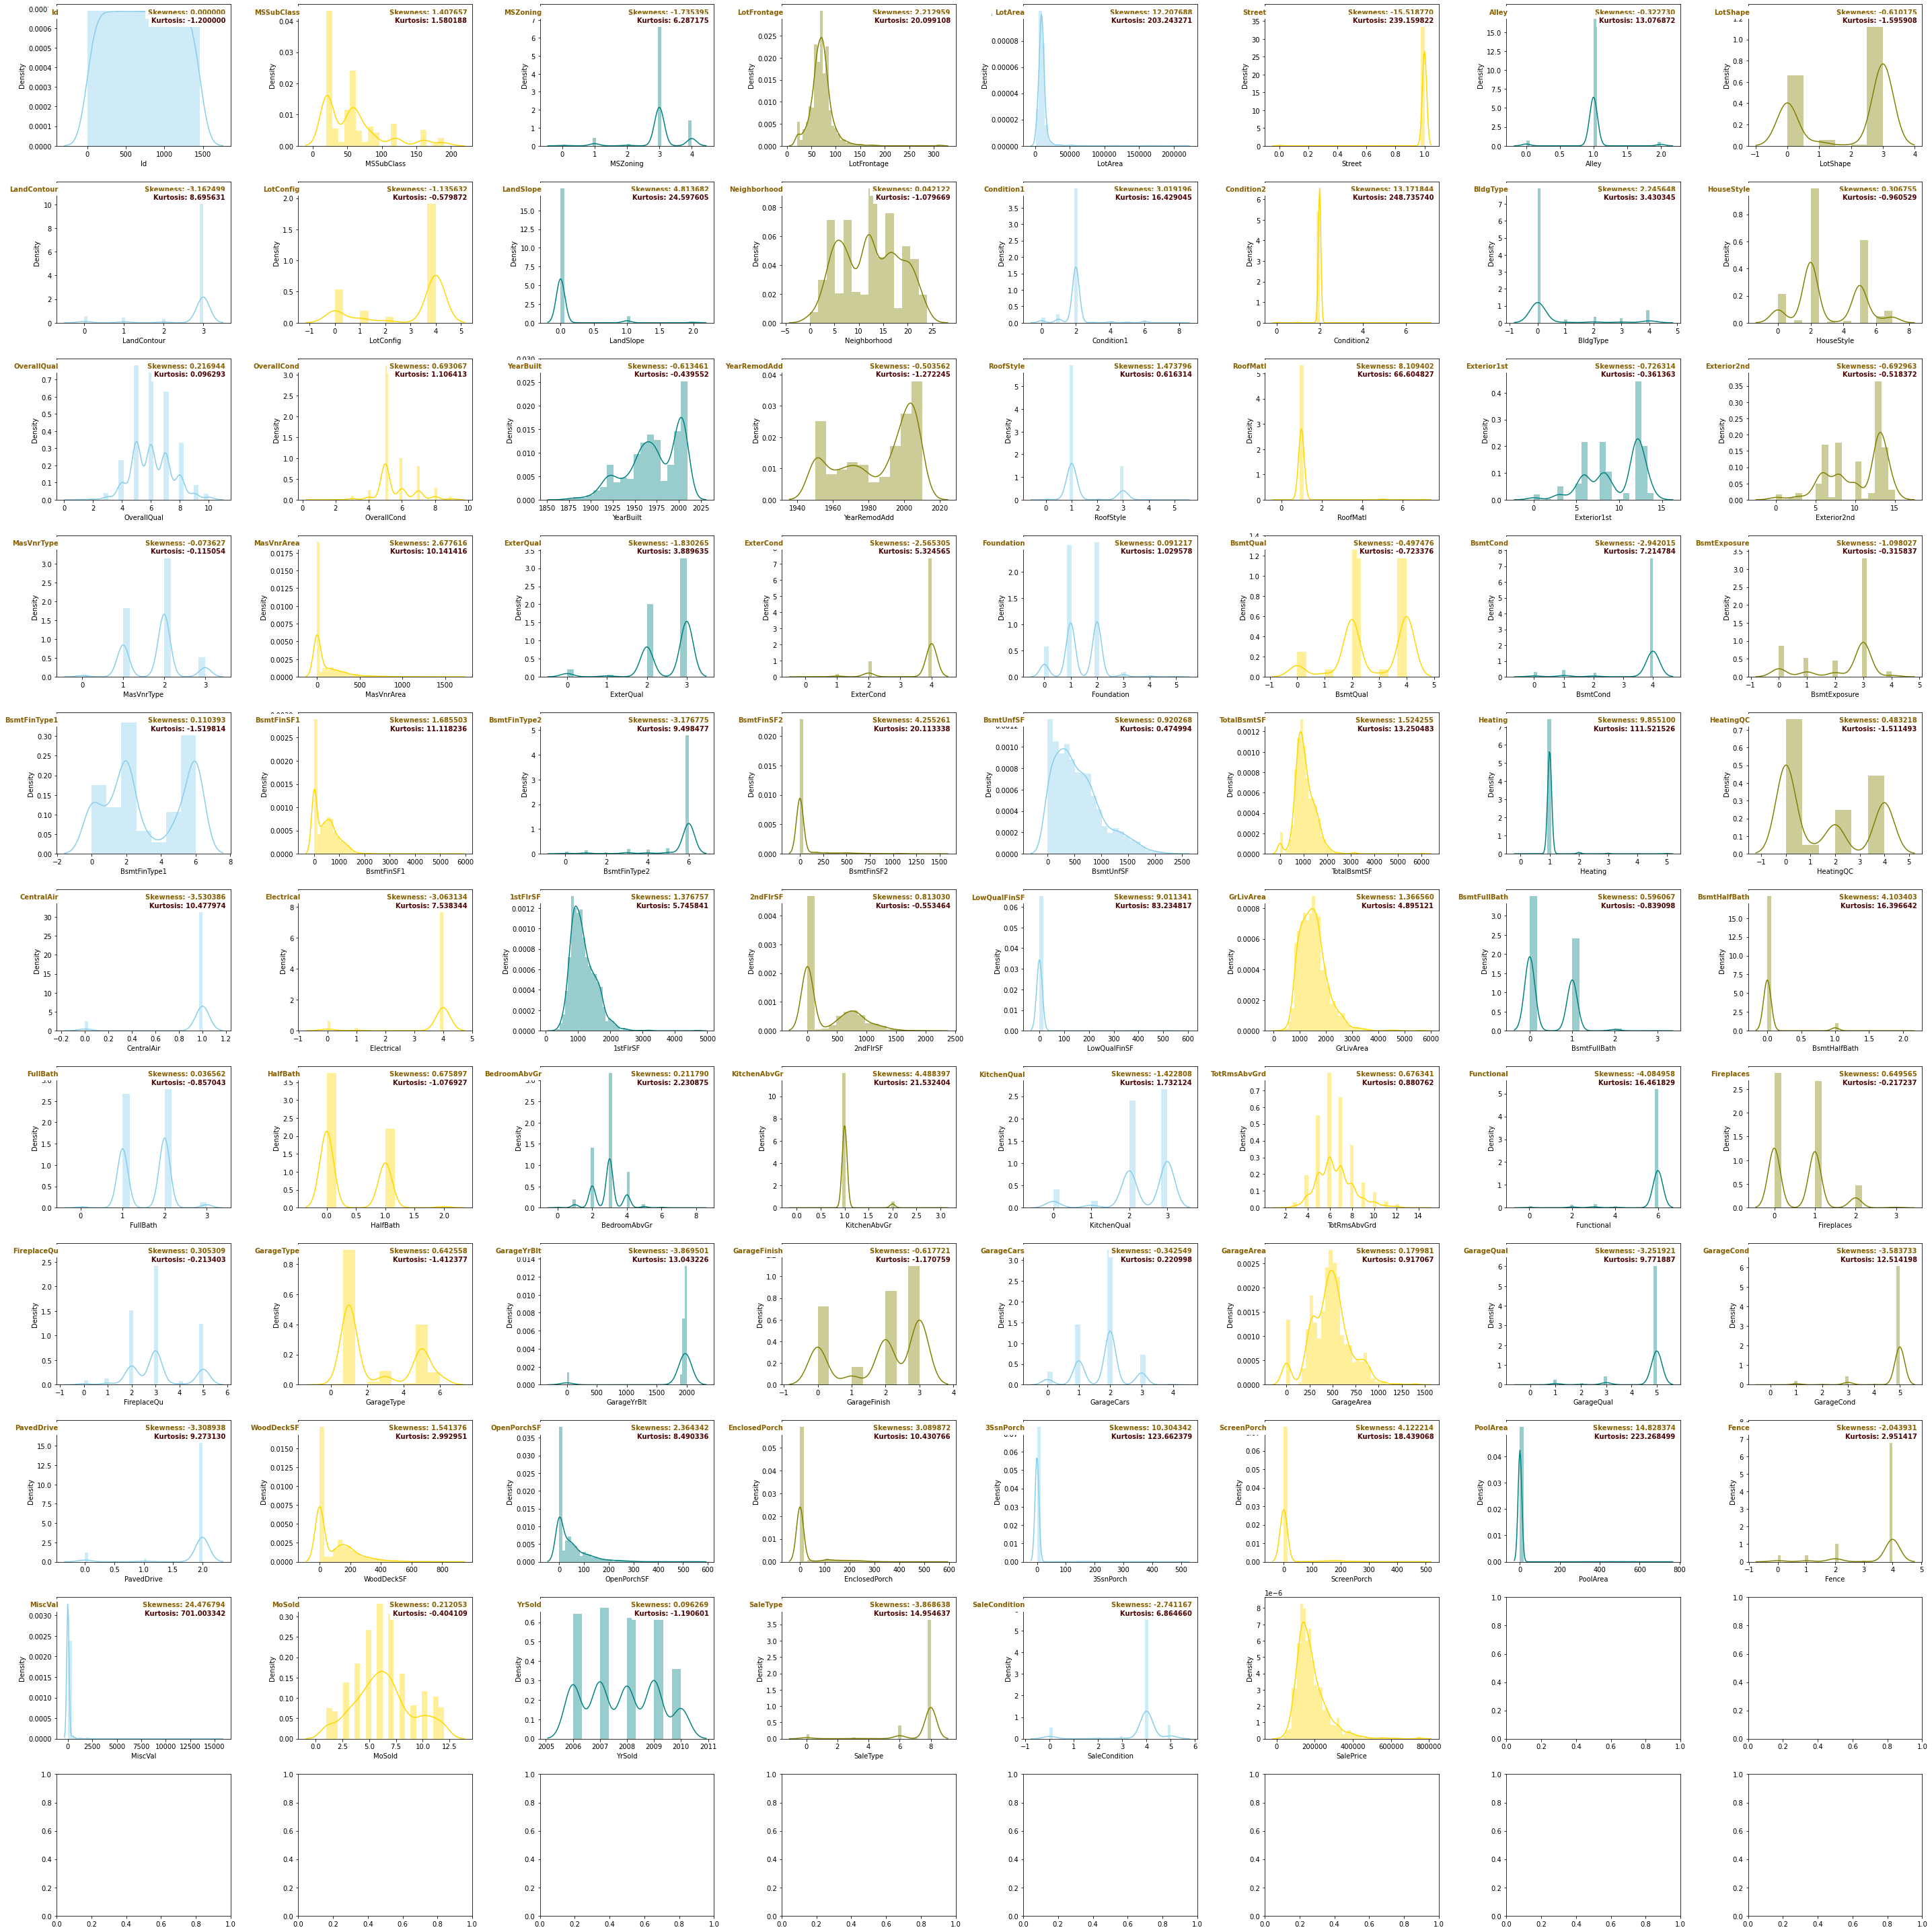

In [ ]:
def drawAndCheckSkewnessAndKurtosis():
  colors = ["skyblue","gold","teal","olive"]
  namesOfFeatures = df_copy.columns

  colorIdx = 0
  f, axes = plt.subplots(11,8,figsize=(40, 40))
  i = 0
  j = 0
  take = 0
  for feature in namesOfFeatures:
      sns.distplot(df_copy[feature], color=colors[colorIdx%4], ax=axes[i,j])
      if j >= 7: 
          i+=1
          j=0
      else: 
          j+=1
      colorIdx+=1

  for i, ax in enumerate(axes.reshape(-1)):
    if(i >= 77):
      continue
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df_copy.iloc[:,i].skew(),\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df_copy.iloc[:,i].kurt(),\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:dried blood')
    ax.text(x=0.01, y=0.97, transform=ax.transAxes, s=namesOfFeatures[i],\
          fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
          backgroundcolor='white', color='xkcd:poo brown')
      
  plt.tight_layout()
drawAndCheckSkewnessAndKurtosis()

In [ ]:
numeric_feats = df_copy.dtypes[df_copy.dtypes != 'object'].index
skewed_feats = df_copy[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) >= 1]
high_skew

MiscVal          24.476794
PoolArea         14.828374
Condition2       13.171844
LotArea          12.207688
3SsnPorch        10.304342
Heating           9.855100
LowQualFinSF      9.011341
RoofMatl          8.109402
LandSlope         4.813682
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
Condition1        3.019196
MasVnrArea        2.677616
OpenPorchSF       2.364342
BldgType          2.245648
LotFrontage       2.212959
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
RoofStyle         1.473796
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtExposure     -1.098027
LotConfig        -1.135632
KitchenQual      -1.422808
MSZoning         -1.735395
ExterQual        -1.830265
Fence            -2.043931
ExterCond        -2.565305
SaleCondition    -2.741167
BsmtCond         -2.942015
Electrical       -3.063134
L

In [ ]:
skewness = high_skew[abs(high_skew) >= 1]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_copy[feat] = boxcox1p(df_copy[feat], lam)    

There are 47 skewed numerical features to Box Cox transform


### 3.2 Adding New Features

In [ ]:
def addFeatures(m_df):
  m_df['house_age1'] = m_df['YrSold'] - m_df['YearBuilt']
  m_df['house_age2'] = m_df['YrSold'] - m_df['YearRemodAdd']
  m_df['garage_age'] = m_df['YrSold'] - m_df['GarageYrBlt']   
  m_df['total_area'] = (m_df['GrLivArea'] + m_df['TotalBsmtSF'] + m_df['1stFlrSF'] + m_df['2ndFlrSF'])
  m_df['num_rooms'] = m_df['TotRmsAbvGrd'] + m_df['BedroomAbvGr'] + m_df['FullBath']

In [ ]:
addFeatures(m_df)
addFeatures(df_copy)
addFeatures(df_test)

In [ ]:
m_df.shape

(1460, 83)

### 3.3 solving the problem of skewness by using log transformation

In [ ]:
# numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
# skewed_feats = df_copy[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
# high_skew = skewed_feats[abs(skewed_feats) > 1]
# high_skew

In [ ]:
# for feature in high_skew.index:
#   df_copy[feature] = np.log1p(df_copy[feature] + 1)


In [ ]:
dummies = m_df.copy()

### 3.4 Checking the correlation between features


#### 3.4.1 Check the Correlations between the most correlated features 

###### Keep in mind that we are interested only with features linearly correlated with SalePrice only. I will seperate the Categorical from the Numerical, as heatmap does not give an accurate correlation between categorical and numerical features
Check this **link** : https://medium.com/@toprak.mhmt/non-linear-regression-4de80afca347

In [ ]:
df_copy.shape

(1460, 83)

In [ ]:
from scipy import stats

numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index

In [ ]:
numerical_feats = list(numerical_feats)

numerical_feats.append('house_age1')
numerical_feats.append('house_age2')
numerical_feats.append('total_area')
# numerical_feats.append('num_rooms')

In [ ]:
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

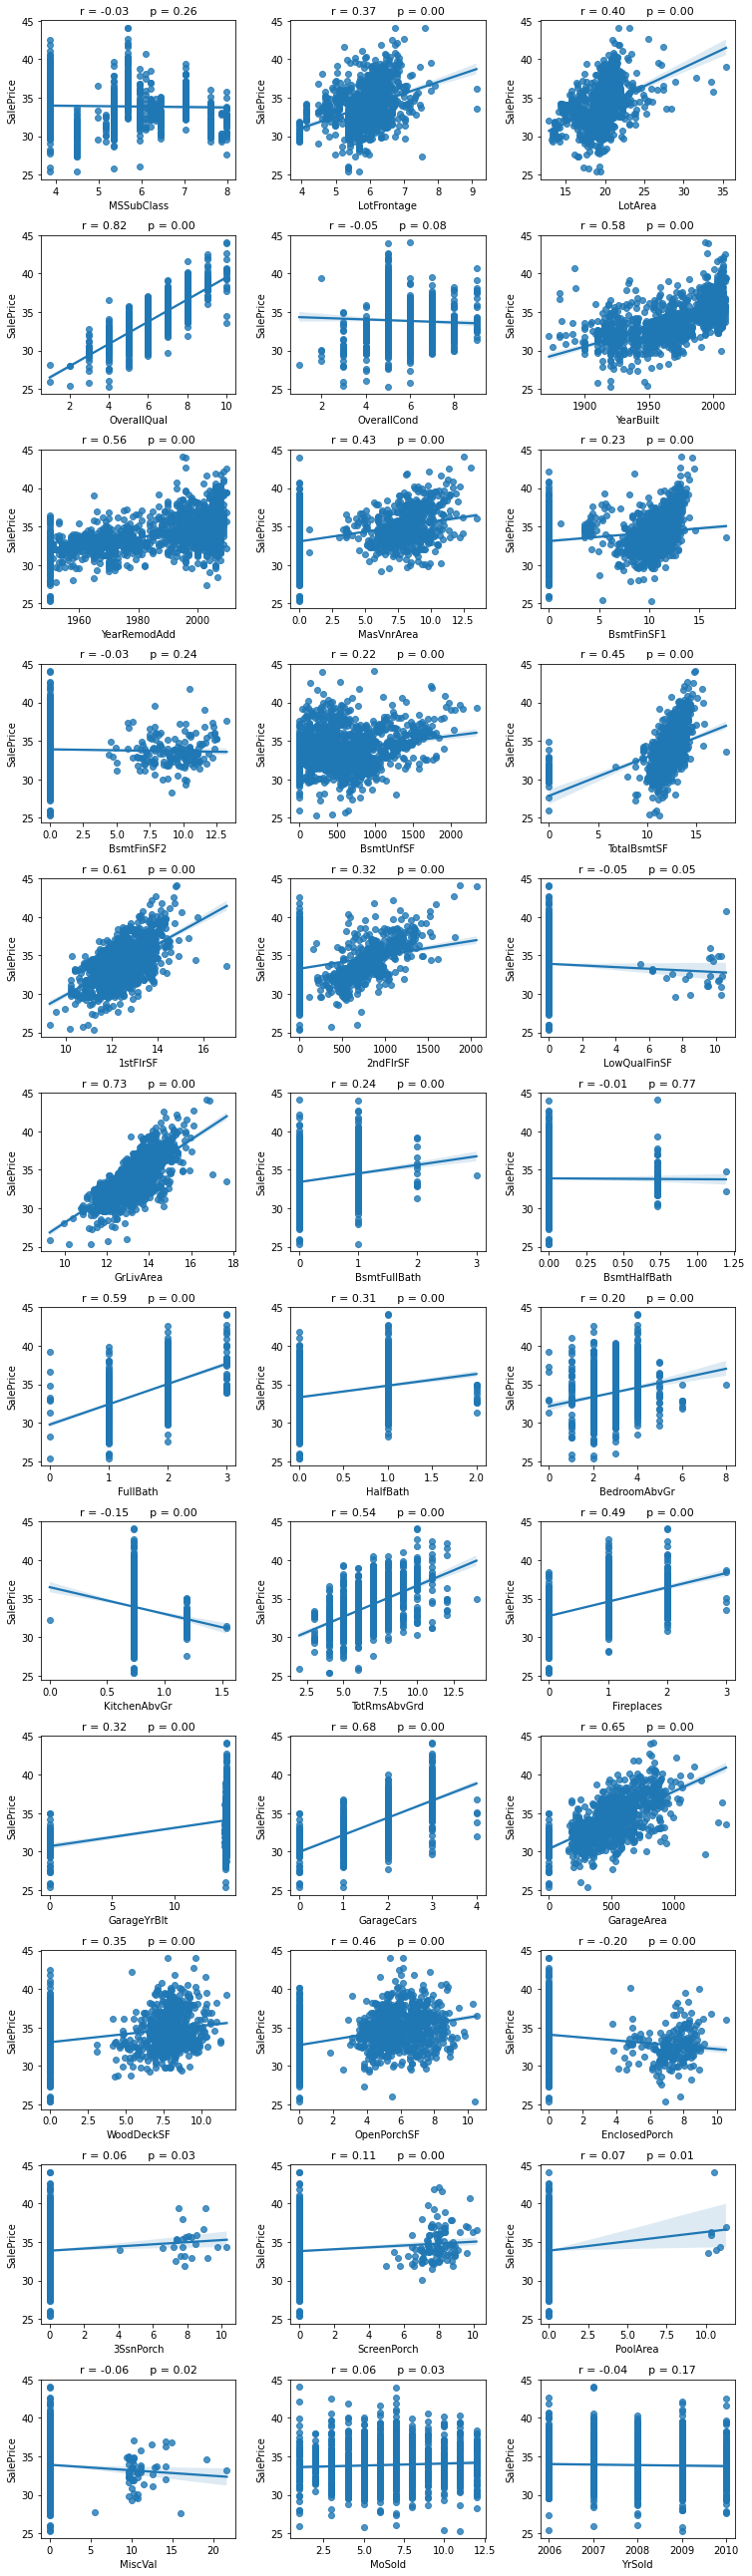

In [ ]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)

li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_copy[li_plot_num_feats[i]], df_copy['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(df_copy[li_plot_num_feats[i]], df_copy['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

##### 3.4.1.1 Check the correlation with Continous Features

In [ ]:
numerical_feats

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'house_age1',
 'house_age2',
 'total_area']

In [ ]:
cor = df_copy[numerical_feats].corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>=0.5]
relevant_features.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'house_age1', 'house_age2'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

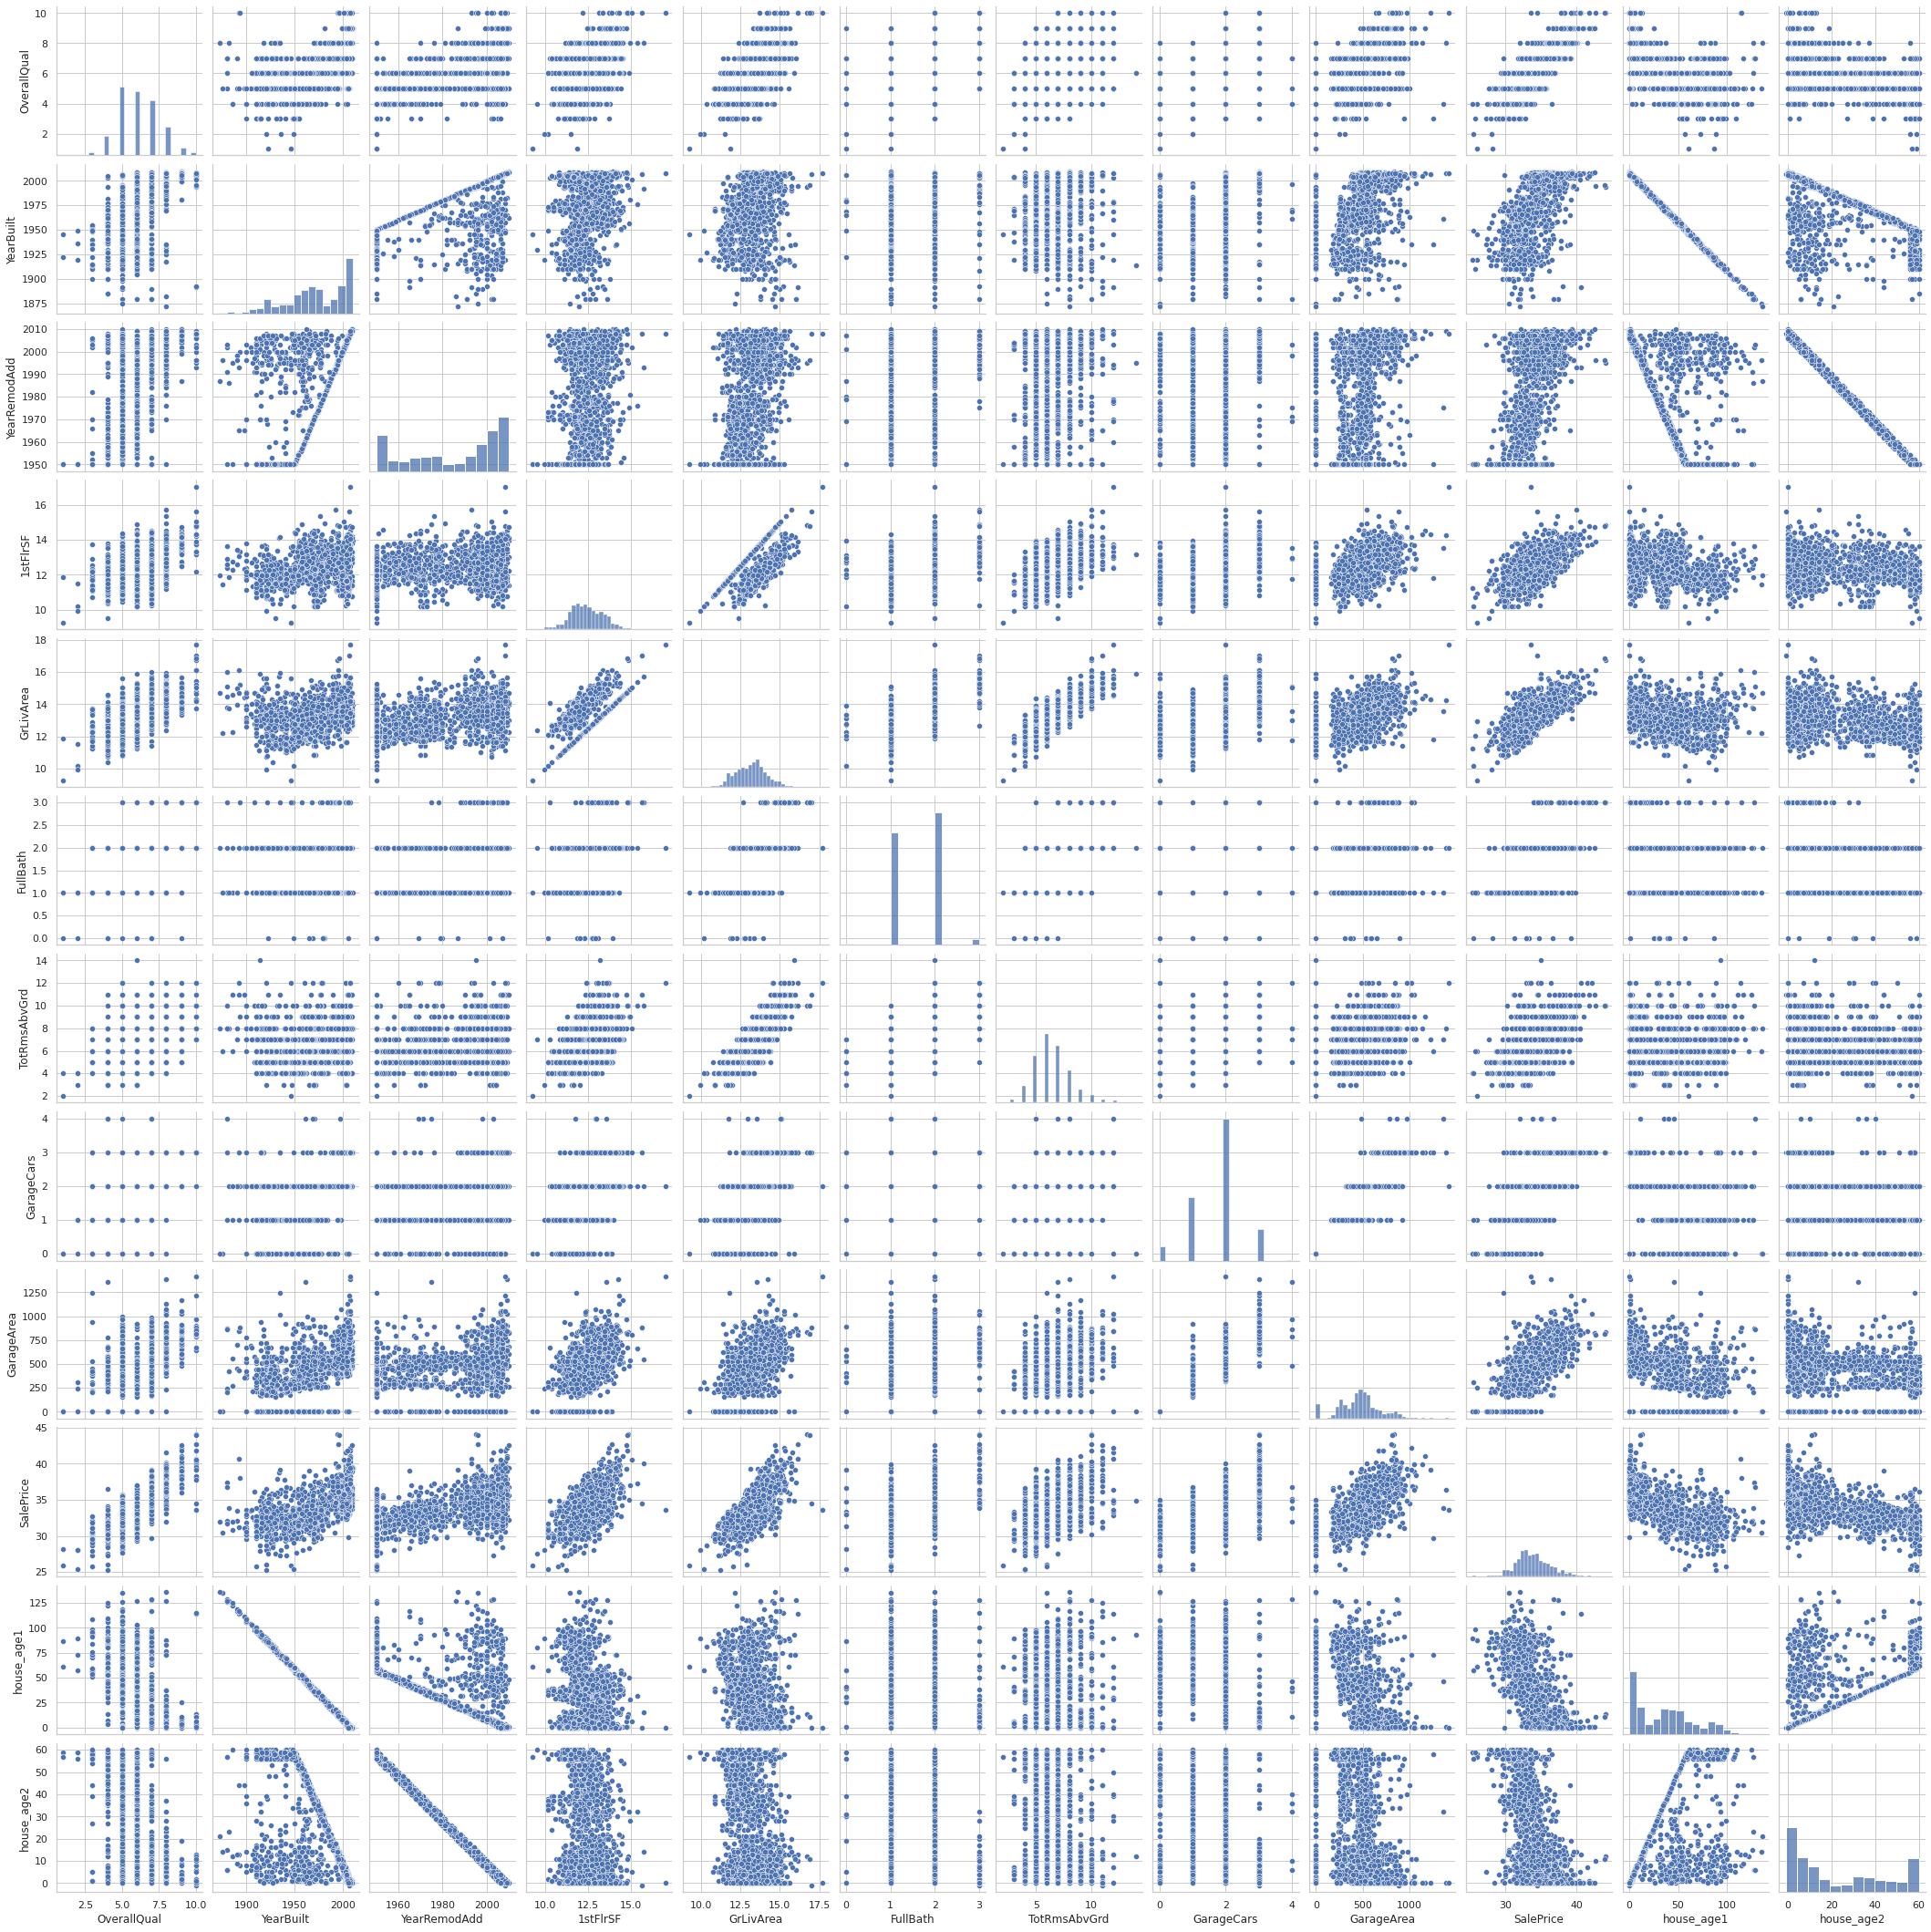

In [ ]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
cols =relevant_features.index
sns.pairplot(df_copy[cols], height = 2.5 )
plt.show()

##### 3.4.1.2 Check the correlation with Categorical Features

In [ ]:
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

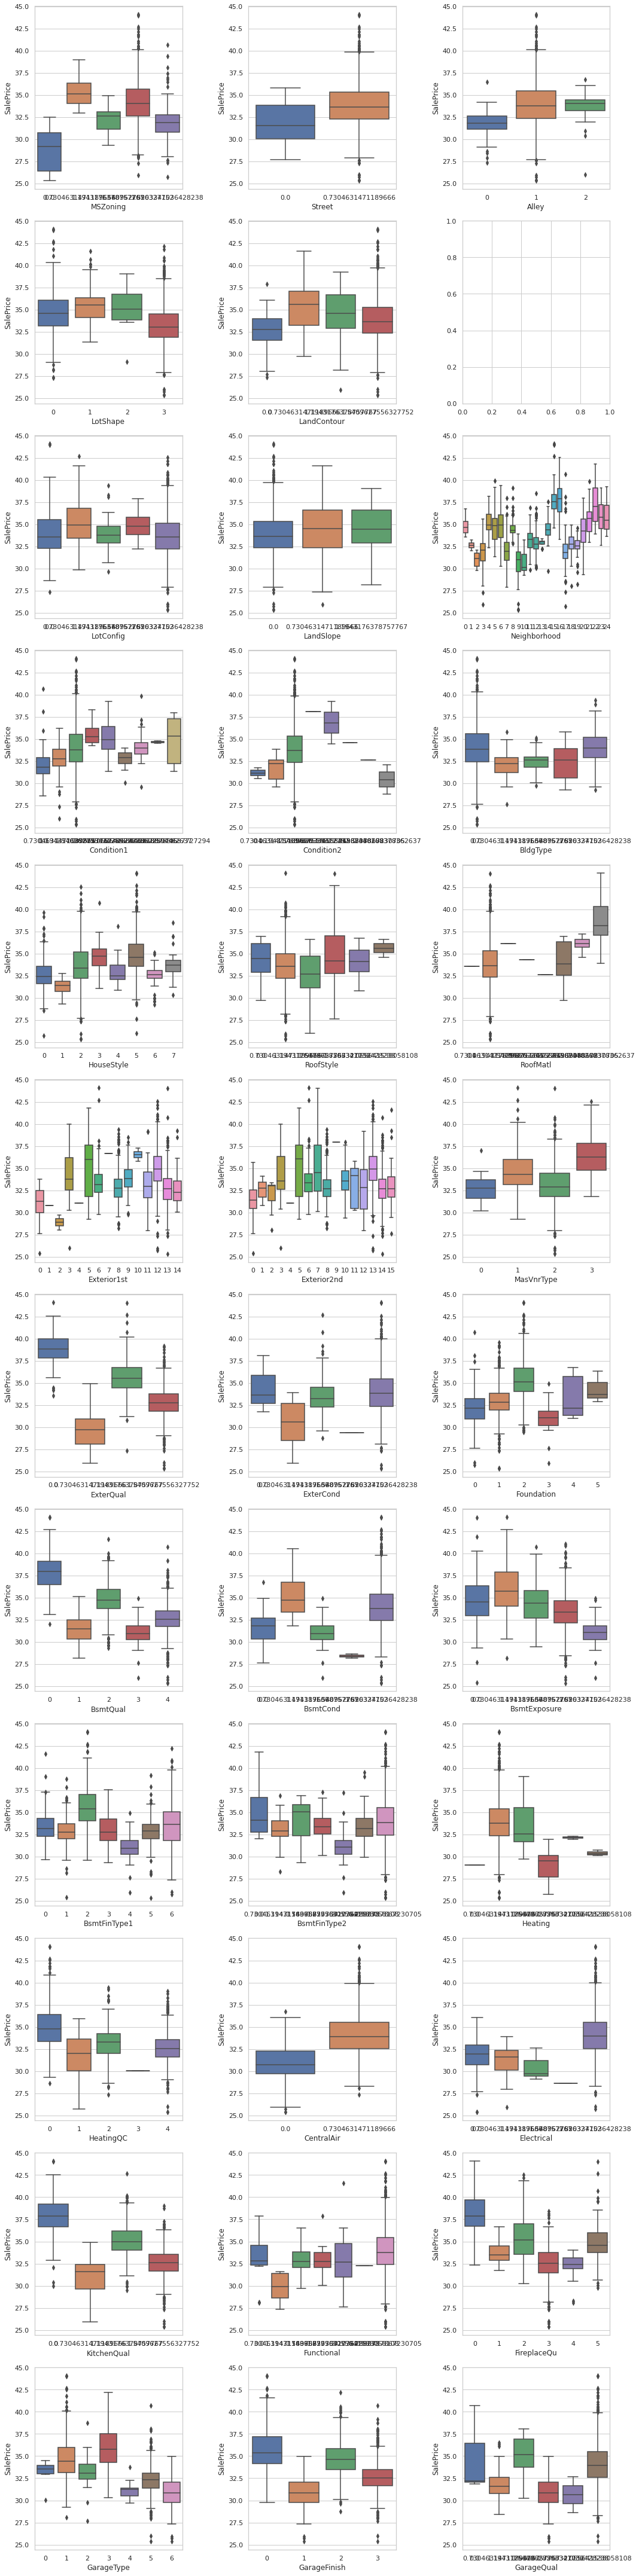

In [ ]:
#Check the Categorical
li_cat_feats = list(categorical_feats)
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
          if(li_cat_feats[i] == 'PoolQC' or li_cat_feats[i] == 'Fence' or li_cat_feats[i] == 'Utilities'):
            continue
          sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=df_copy, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

#### 3.4.3 Converting some Numerical to Categorical Features

In [ ]:
def convert(all_data):
  #MSSubClass=The building class
  all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


  #Changing OverallCond into a categorical variable
  all_data['OverallCond'] = all_data['OverallCond'].astype(str)


  #Year and month sold are transformed into categorical features.
  all_data['YrSold'] = all_data['YrSold'].astype(str)
  all_data['MoSold'] = all_data['MoSold'].astype(str)
  all_data['num_rooms'] = all_data['num_rooms'].astype(str)

In [ ]:
convert(m_df)
convert(df_copy)
convert(df_test)

#### Conclusion for Both numerical and Categorical Features:
#####1. Numerical Features: I have made the threshold for continous features to be 0.45. The features whose linear correlation with respect to the "Sale Price" are ['OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea','FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars','GarageArea', 'OpenPorchSF', 'SalePrice']
##### 2. Categorical Features: From the boxPlots above, the features are the most correlated to the Sale price are  'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 

In [ ]:
chosenNumericalFeatures = ['1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'house_age1', 'house_age2']
chosenCategoricalFeatures =  ['num_rooms', 'OverallQual','MSZoning', 'Neighborhood', 'OverallCond', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'MSSubClass', 'GarageType','YrSold','KitchenQual']

##### 3.1.2 Using Heatmaps Representing Correlations
##### We cannot rely on heatMap only because it results in the **linear** correlation between features.

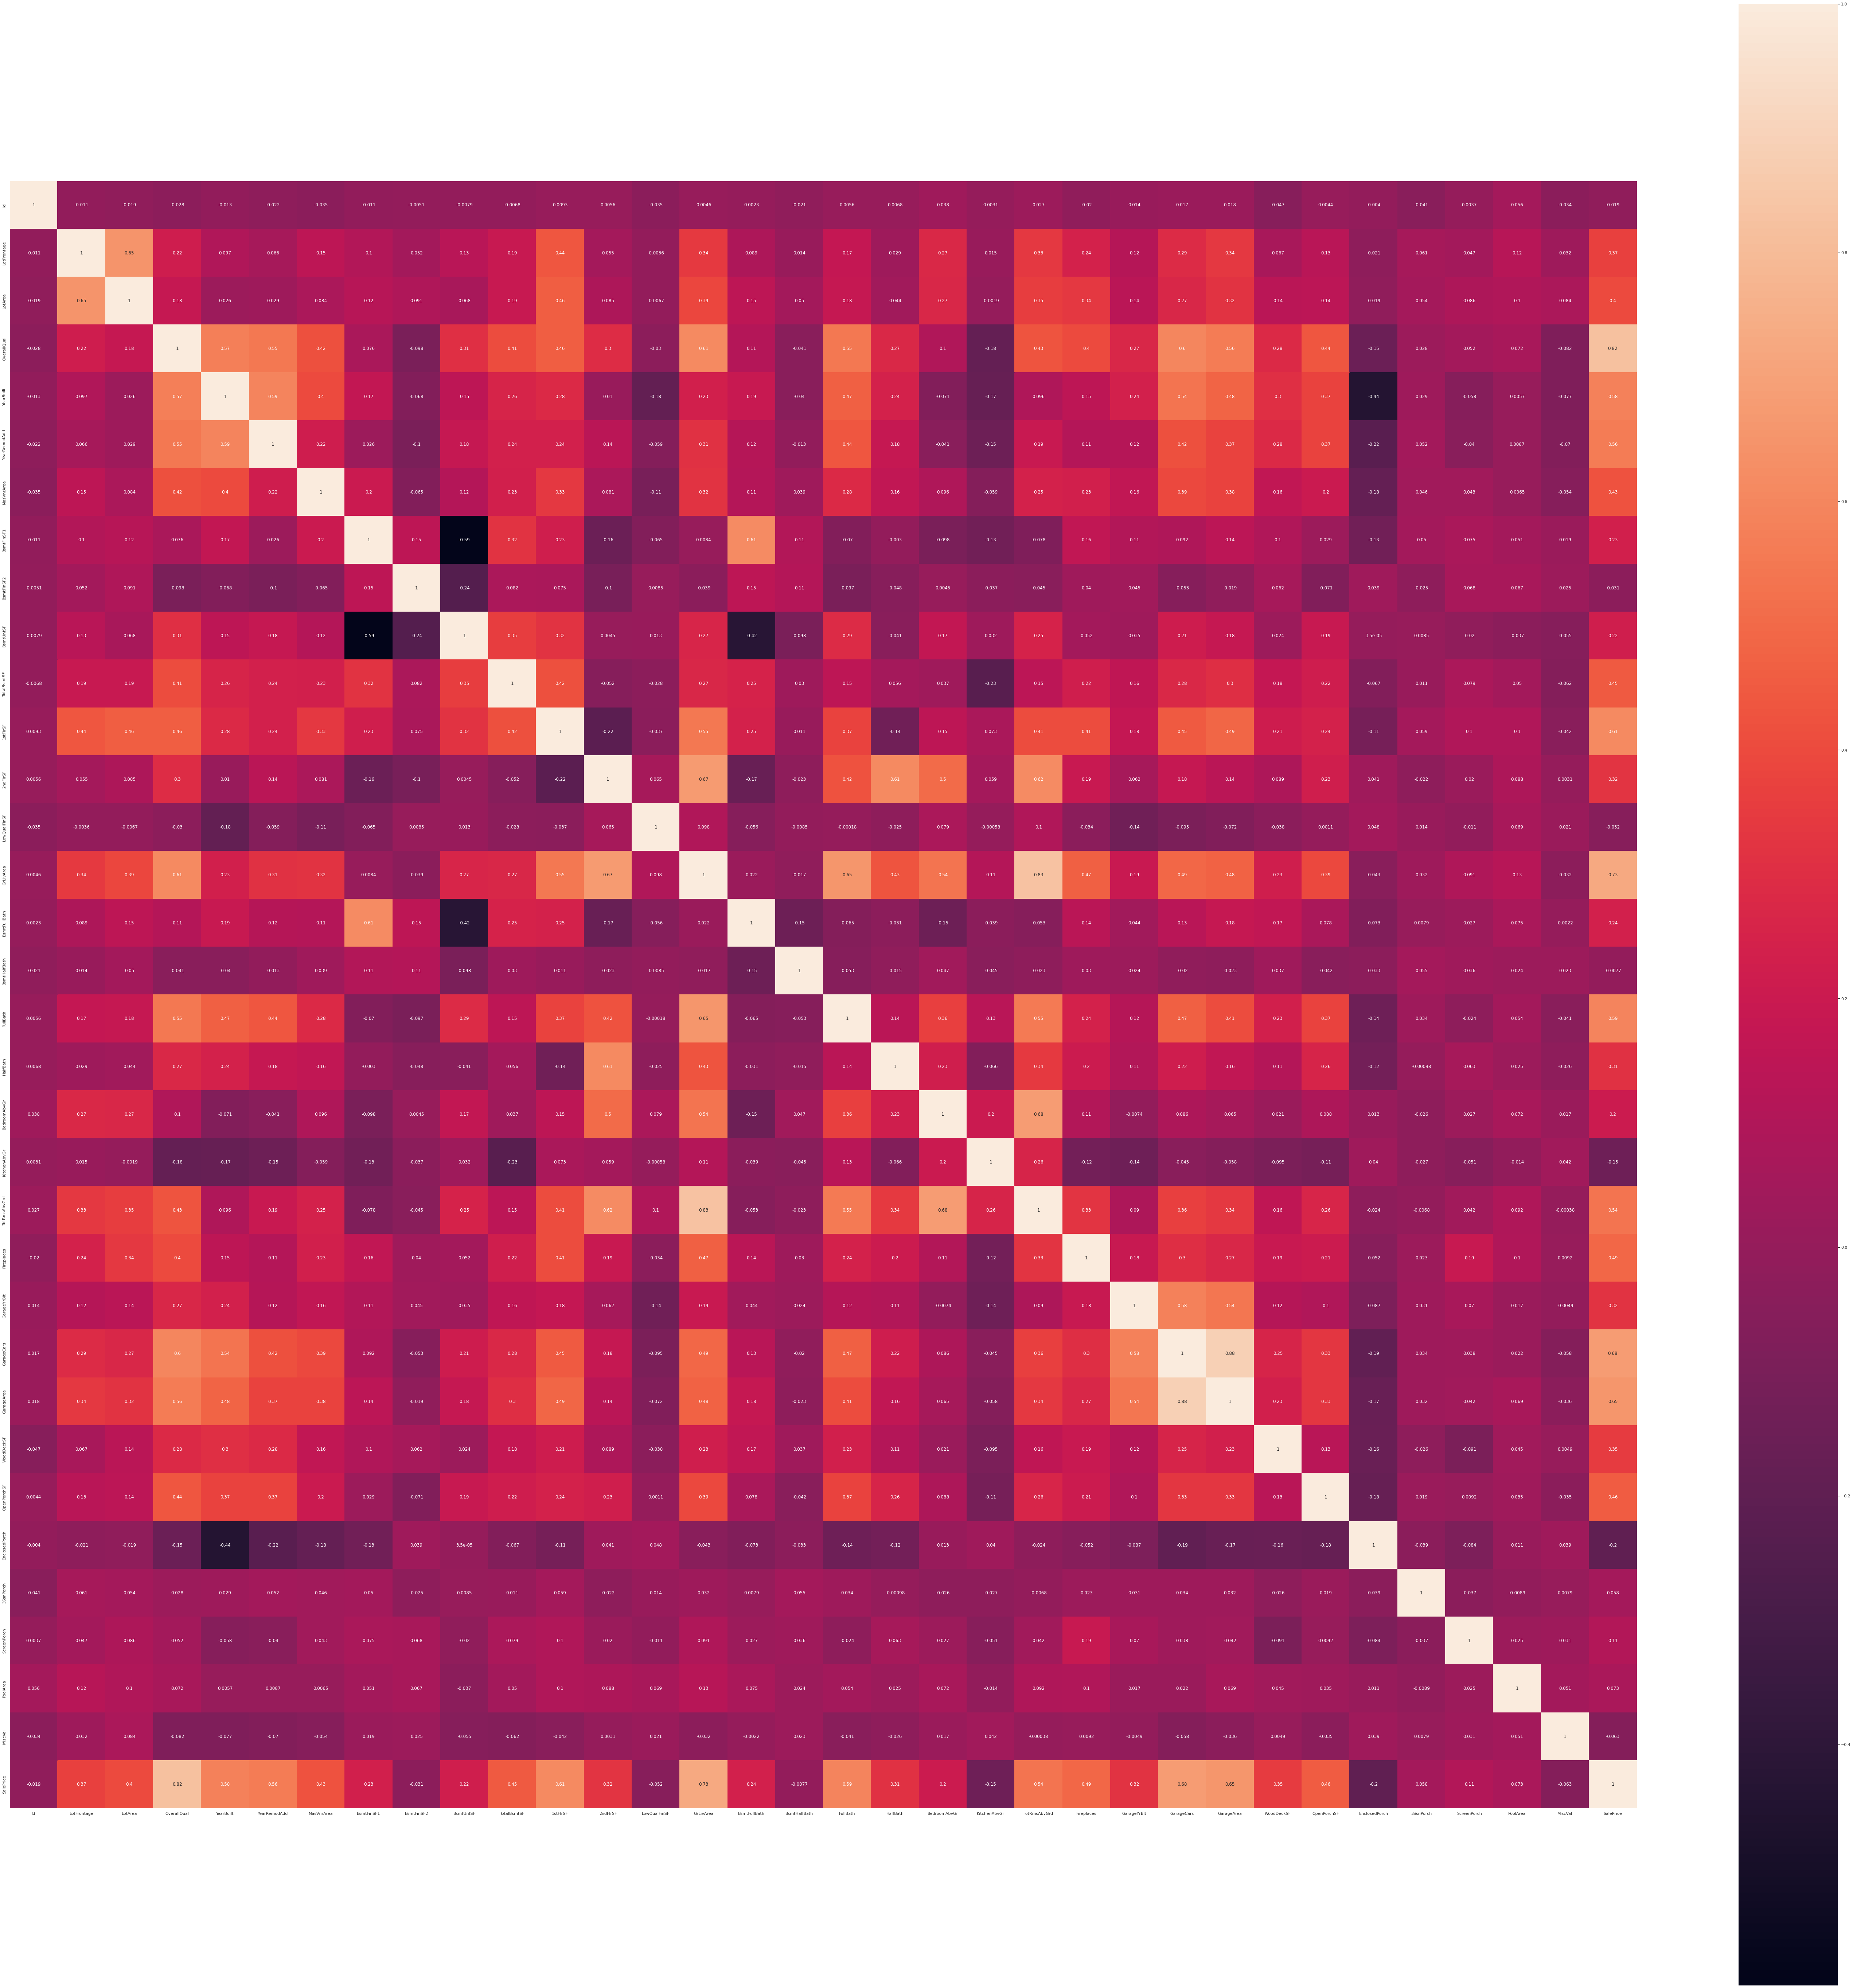

In [ ]:
# get those 10 predictor variables's column name
col_name = corr_target.keys()

# get the correlation coefficient
corr_map = df_copy[col_name].corr()

# plot the heatmap
plt.figure(figsize=(100,100))
sns.heatmap(corr_map, square=True, annot=True)
plt.show()

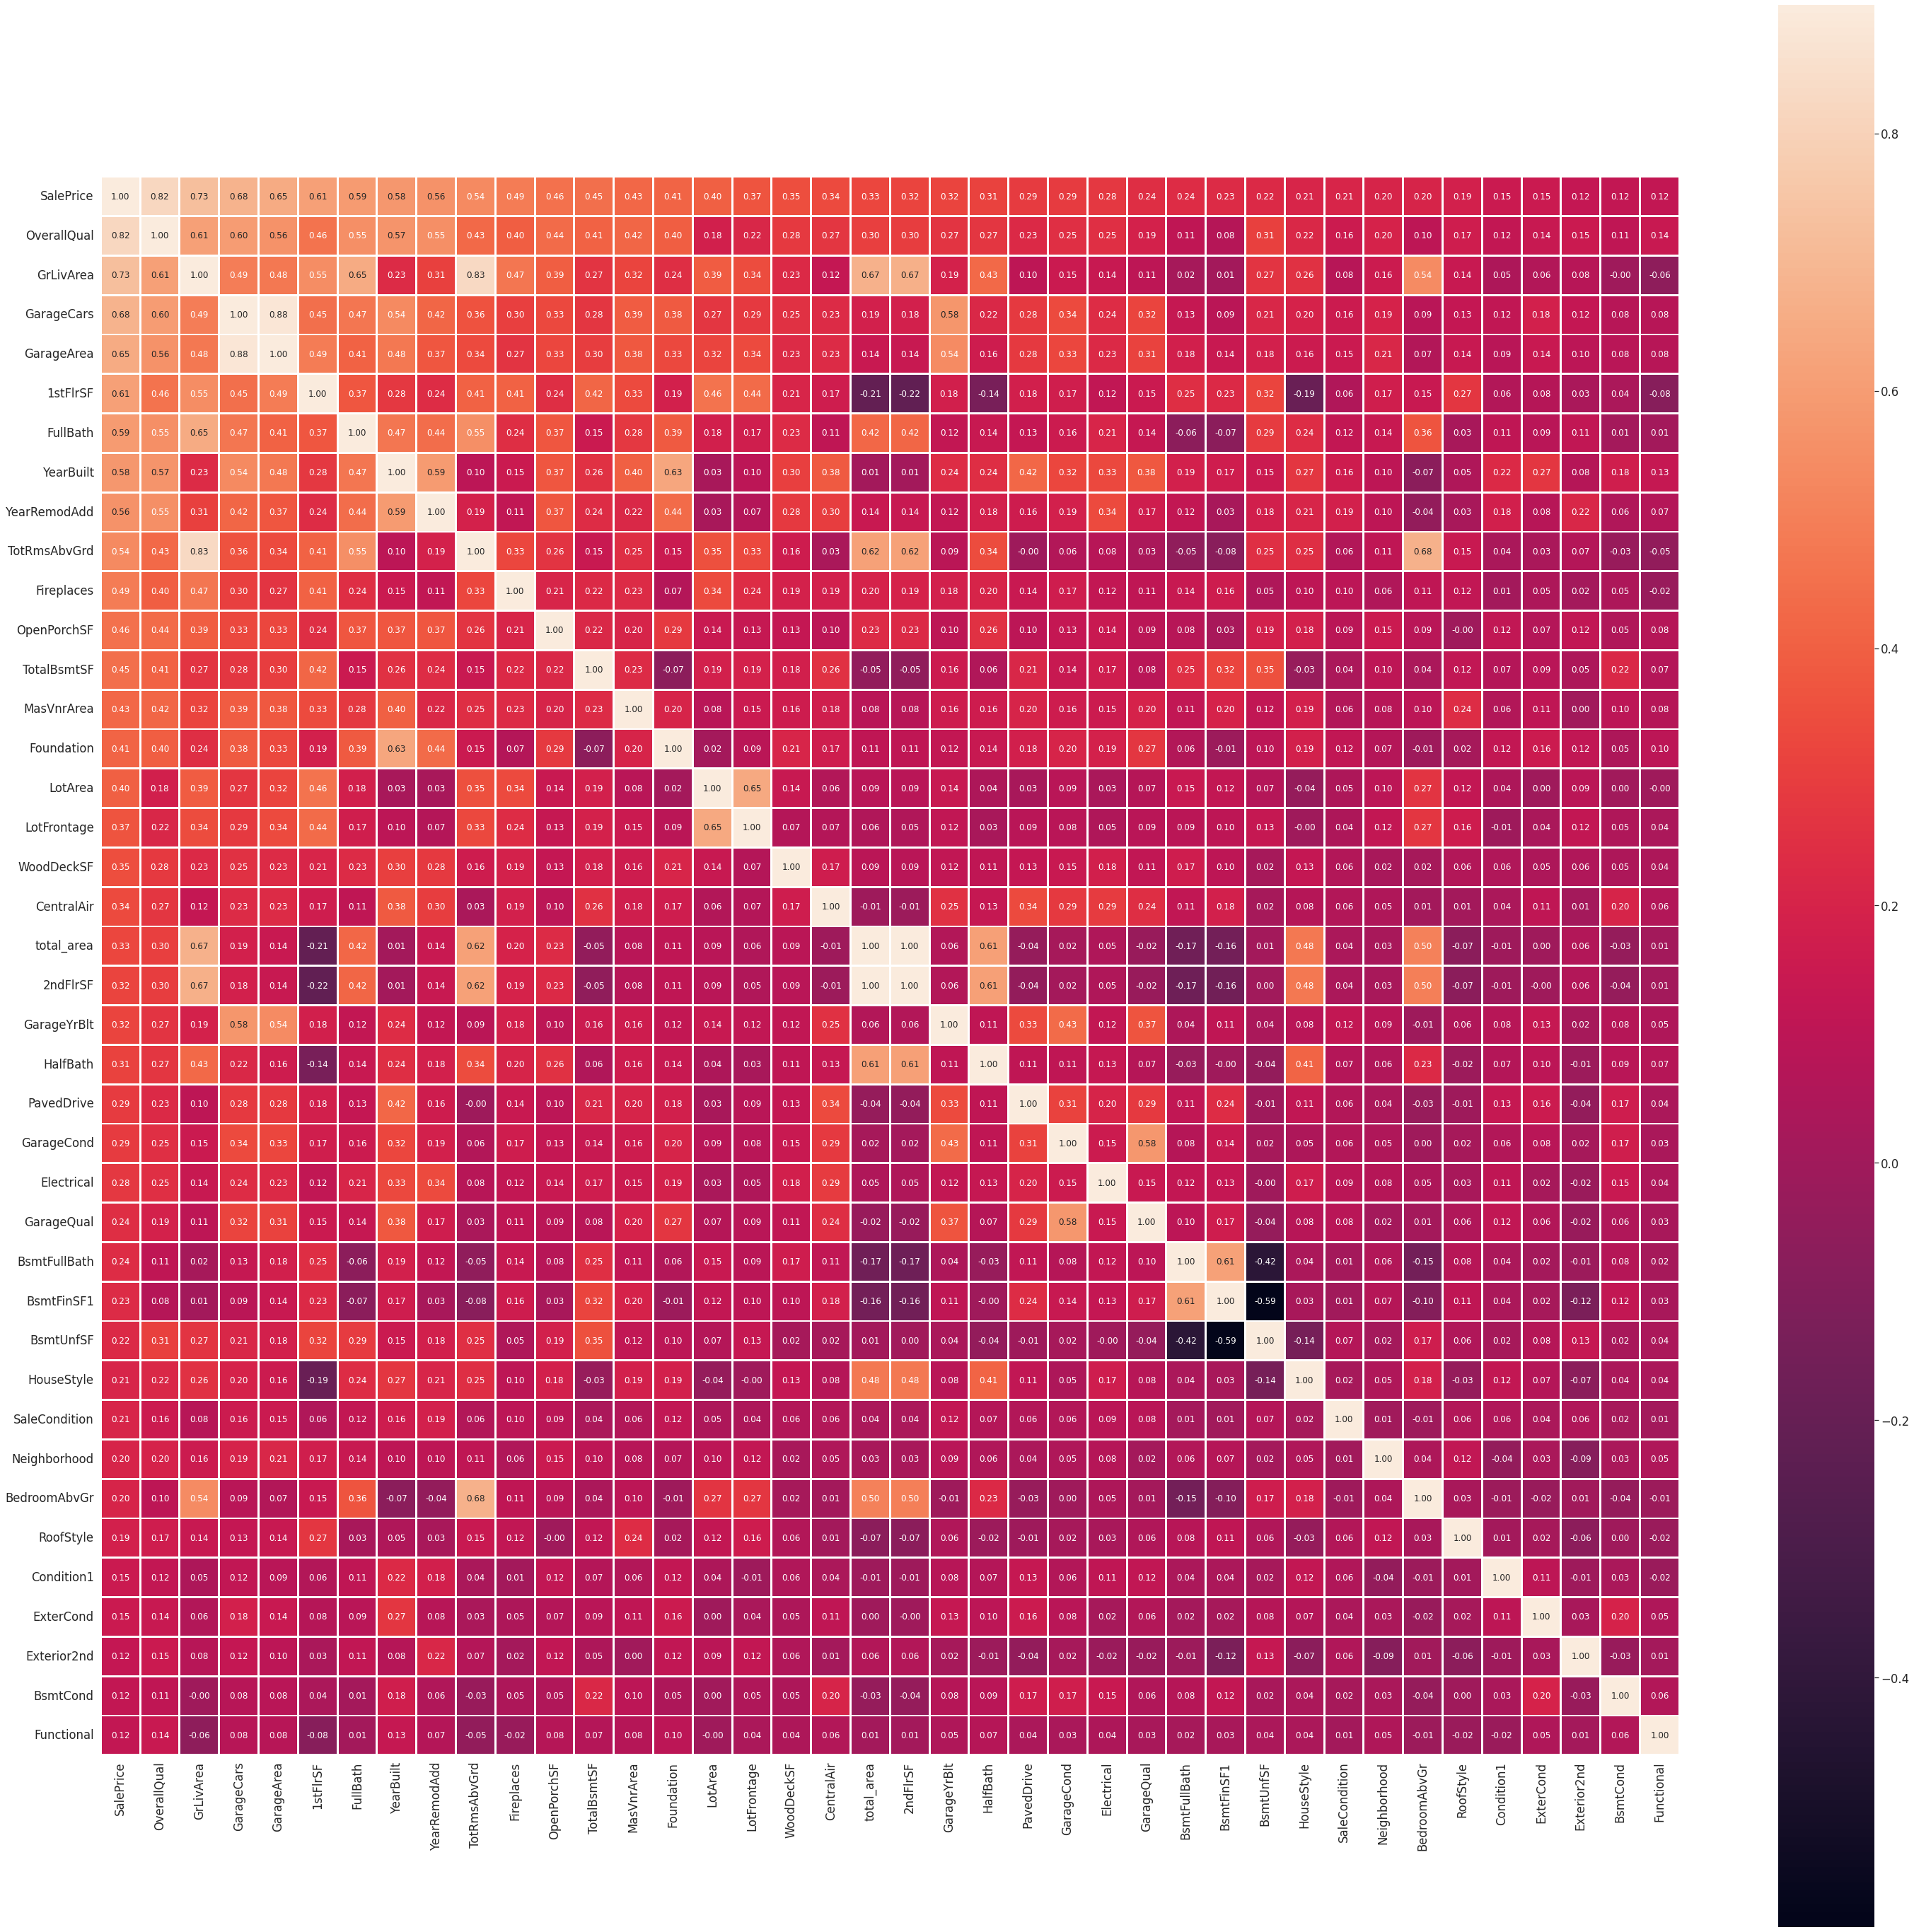

In [ ]:
train_corrmatrix = df_copy.corr()
cols = train_corrmatrix.nlargest(40, "SalePrice")['SalePrice'].index
cm = np.corrcoef(df_copy[cols].values.T)
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, linewidths=2, vmax=.9, square=True, annot=True,\
           fmt=".2f", annot_kws={"size":12},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

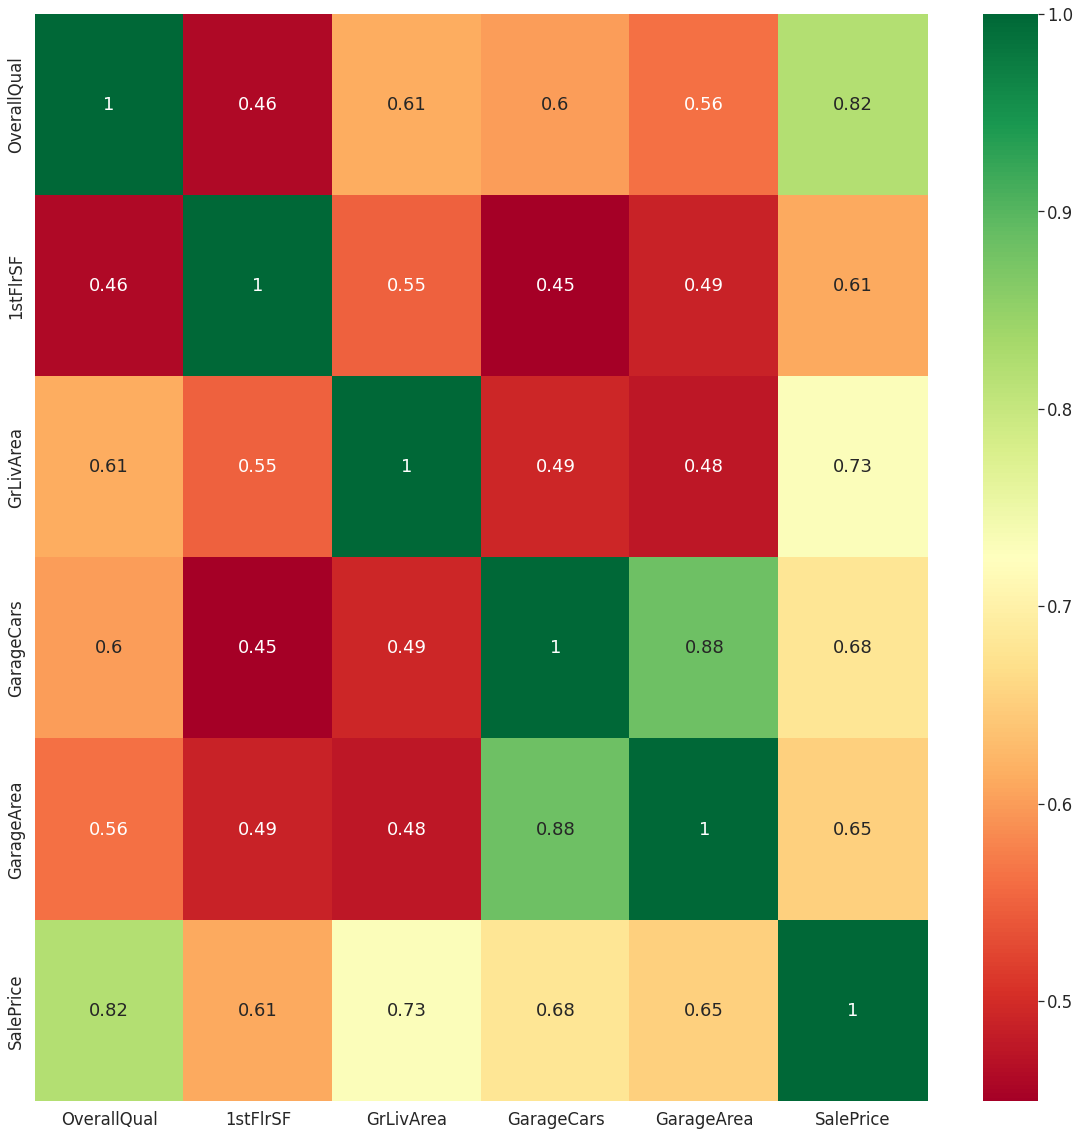

In [ ]:
corr = df_copy.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.6]
plt.figure(figsize=(20,20))
g = sns.heatmap(df_copy[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

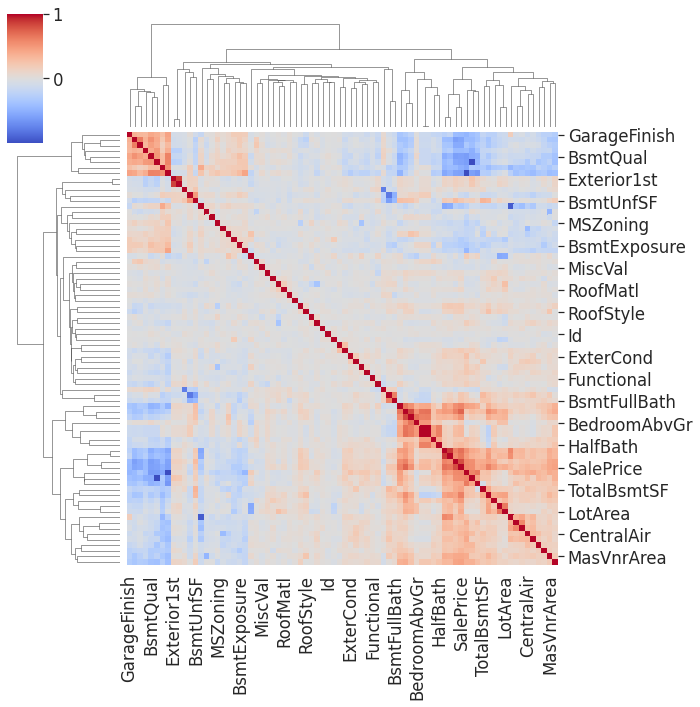

In [ ]:
sns.clustermap(df_copy.corr(),cmap="coolwarm")

#### 3.4.2 Checking the Outliers

##### From above, we can see that from the pervious section, there are outliers we need to remove

In [ ]:
# m_df['OverallQual'] =  boxcox1p(m_df['OverallQual'], lam)
m_df['SalePrice'] =  boxcox1p(m_df['SalePrice'], lam)


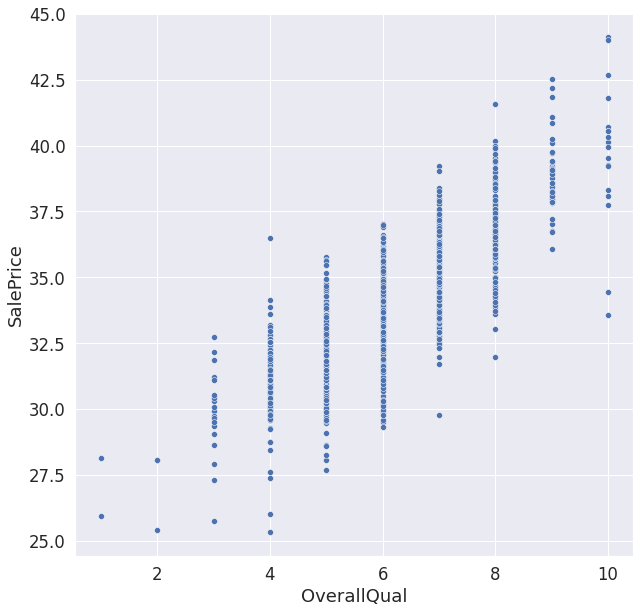

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=m_df['OverallQual'], y=m_df['SalePrice'])

In [ ]:
df_copy = df_copy.drop(
    df_copy[(df_copy['OverallQual']==10) & (df_copy['SalePrice']<35)].index)


In [ ]:
m_df =  m_df.drop(
    m_df[(m_df['OverallQual']==10) & (m_df['SalePrice']<(35))].index)

In [ ]:
m_df.shape

(1458, 83)

In [ ]:
m_df['GrLivArea'] =  boxcox1p(m_df['GrLivArea'], lam)


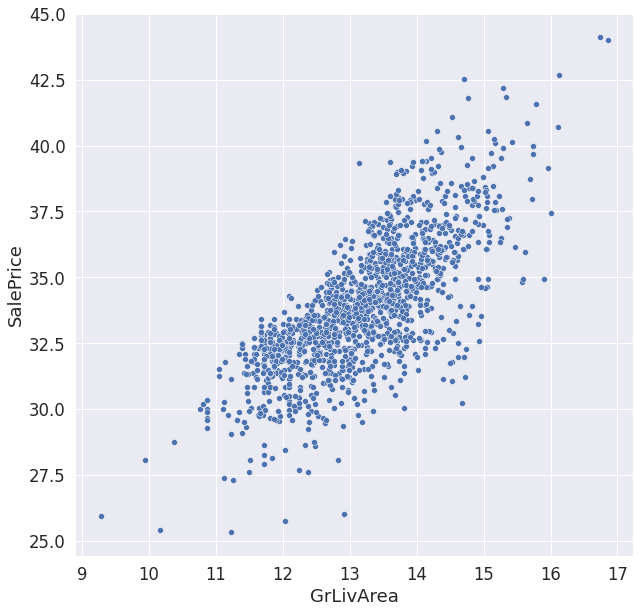

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_copy['GrLivArea'], y=df_copy['SalePrice'])

In [ ]:
df_copy = df_copy.drop(
    df_copy[(df_copy['GrLivArea']>8.3) & (df_copy['SalePrice']<27.5)].index)
m_df = m_df.drop(
    m_df[(m_df['GrLivArea']>8.3) & (m_df['SalePrice']<(27.5))].index)

In [ ]:
m_df.shape

(1451, 83)

#### 3.4.3 Check for Multicollinearity
#### From above, we can see that Strong correlation of these features to other, similar features:

##### 1. 'GrLivArea' and 'num_rooms'
#####2. 'GarageCars' and 'GarageArea'
#####3. 'house_age1' and'garage_age'
#####4. 'YearBuilt' and 'GarageYrBlt'

#### we need to drop the least ones in terms of correlation with respect to the SalePrice

In [ ]:
all_data = pd.concat([df_copy, df_test],axis = 0)
all_data.shape

(2910, 83)

In [ ]:
numerical_df = all_data[chosenNumericalFeatures].copy()
categorical_df = all_data[chosenCategoricalFeatures].copy()

In [ ]:
numerical_df

1stFlrSF    GrLivArea  FullBath  ...  GarageArea  house_age1  house_age2
0       11.692623    13.698888         2  ...       548.0           5           5
1       12.792276    12.792276         2  ...       460.0          31          31
2       11.892039    13.832085         2  ...       608.0           7           6
3       12.013683    13.711364         1  ...       642.0          91          36
4       12.510588    14.480029         2  ...       836.0           8           8
...           ...          ...       ...  ...         ...         ...         ...
1454   546.000000  1092.000000         1  ...         0.0          36          36
1455   546.000000  1092.000000         1  ...       286.0          36          36
1456  1224.000000  1224.000000         1  ...       576.0          46          10
1457   970.000000   970.000000         1  ...         0.0          14          14
1458   996.000000  2000.000000         2  ...       650.0          13          12

[2910 rows x 8 columns]

In [ ]:
cols = df_copy.columns
corrFeatures = {}
for feature1 in cols:
  for feature2 in cols: 
    if(feature1 in chosenNumericalFeatures and feature2 in chosenNumericalFeatures):
      if(feature1 == feature2 or feature1 == 'SalePrice' or feature2 == 'SalePrice'):
        continue
      if(feature2 in corrFeatures):
        continue
      if(cor[feature1][feature2] >= 0.6):
        corrFeatures[feature1] =  feature2
    
corrFeatures

{'GarageCars': 'GarageArea', 'GrLivArea': 'TotRmsAbvGrd'}

In [ ]:
def check(feature1 ,feature2):
  corr1 = cor[feature1]["SalePrice"]
  corr2 =  cor[feature2]["SalePrice"]
  print(corr1, " ", corr2)



In [ ]:
for key in corrFeatures: 
  print(key , " :",corrFeatures[key])
  check(key, corrFeatures[key])

GrLivArea  : TotRmsAbvGrd
0.7303844908875786   0.5380684684461616
GarageCars  : GarageArea
0.6799072173775752   0.6518828342468678


#### Conclusion: 
##### we need to remove [GarageYrBlt,num_rooms,GarageCars]

In [ ]:
main_df = pd.concat([numerical_df,categorical_df],axis = 1)
main_df

1stFlrSF    GrLivArea  FullBath  ...  GarageType  YrSold  KitchenQual
0       11.692623    13.698888         2  ...           1    2008     1.194318
1       12.792276    12.792276         2  ...           1    2007     1.540963
2       11.892039    13.832085         2  ...           1    2008     1.194318
3       12.013683    13.711364         1  ...           5    2006     1.194318
4       12.510588    14.480029         2  ...           1    2008     1.194318
...           ...          ...       ...  ...         ...     ...          ...
1454   546.000000  1092.000000         1  ...        None    2006           TA
1455   546.000000  1092.000000         1  ...     CarPort    2006           TA
1456  1224.000000  1224.000000         1  ...      Detchd    2006           TA
1457   970.000000   970.000000         1  ...        None    2006           TA
1458   996.000000  2000.000000         2  ...      Attchd    2006           TA

[2910 rows x 21 columns]

In [ ]:
Y = pd.concat([df_copy['SalePrice'],df_test['SalePrice']],axis = 0)

In [ ]:
all_data.shape

(2910, 83)

In [ ]:
##### we need to remove [GarageYrBlt, TotRmsAbvGrd, Garage Area]
#Second Remove the feature leading to multi-collinarity
main_df.drop('GarageCars', inplace = True, axis = 1)


In [ ]:
main_df.drop('num_rooms', inplace = True, axis = 1)


In [ ]:
# main_df.drop('SalePrice', inplace = True, axis = 1)
# main_df

In [ ]:
chosenCategoricalFeatures

['num_rooms',
 'OverallQual',
 'MSZoning',
 'Neighborhood',
 'OverallCond',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'MSSubClass',
 'GarageType',
 'YrSold',
 'KitchenQual']

#### 3.4.5 Encoding the Categorical Features
#### I have done label encoding and one hot encoding, and I have found that one hot encoding gives the best results

In [ ]:
temp = main_df.copy()

In [ ]:
chosenCategoricalFeatures

['num_rooms',
 'OverallQual',
 'MSZoning',
 'Neighborhood',
 'OverallCond',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'MSSubClass',
 'GarageType',
 'YrSold',
 'KitchenQual']

In [ ]:
df_test

Id MSSubClass MSZoning  ...  garage_age  total_area num_rooms
0     1461         20       RH  ...        49.0      2674.0         8
1     1462         20       RL  ...        52.0      3987.0        10
2     1463         60       RL  ...        13.0      4186.0        11
3     1464         60       RL  ...        12.0      4134.0        12
4     1465        120       RL  ...        18.0      3840.0         9
...    ...        ...      ...  ...         ...         ...       ...
1454  2915        160       RM  ...      2006.0      2730.0         9
1455  2916        160       RM  ...        36.0      2730.0        10
1456  2917         20       RL  ...        46.0      3672.0        12
1457  2918         85       RL  ...      2006.0      2852.0        10
1458  2919         60       RL  ...        13.0      4996.0        14

[1459 rows x 83 columns]

In [ ]:
concatenated = pd.concat([m_df[chosenCategoricalFeatures], df_test[chosenCategoricalFeatures]], axis = 0)
dum = pd.get_dummies(concatenated)
dum

OverallQual  num_rooms_10  ...  KitchenQual_Gd  KitchenQual_TA
0               7             0  ...               1               0
1               6             0  ...               0               1
2               7             0  ...               1               0
3               7             0  ...               1               0
4               8             0  ...               1               0
...           ...           ...  ...             ...             ...
1454            4             0  ...               0               1
1455            4             1  ...               0               1
1456            5             0  ...               0               1
1457            5             1  ...               0               1
1458            7             0  ...               0               1

[2910 rows x 106 columns]

In [ ]:
temp.drop(['OverallQual',
 'MSZoning',
 'Neighborhood',
 'OverallCond',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'MSSubClass',
 'GarageType',
 'YrSold',
 'KitchenQual'],inplace = True, axis = 1)

In [ ]:
temp = pd.concat([temp, dum], axis = 1)

In [ ]:
temp

1stFlrSF    GrLivArea  ...  KitchenQual_Gd  KitchenQual_TA
0       11.692623    13.698888  ...               1               0
1       12.792276    12.792276  ...               0               1
2       11.892039    13.832085  ...               1               0
3       12.013683    13.711364  ...               1               0
4       12.510588    14.480029  ...               1               0
...           ...          ...  ...             ...             ...
1454   546.000000  1092.000000  ...               0               1
1455   546.000000  1092.000000  ...               0               1
1456  1224.000000  1224.000000  ...               0               1
1457   970.000000   970.000000  ...               0               1
1458   996.000000  2000.000000  ...               0               1

[2910 rows x 113 columns]

#### 3.4.6 Normalizing and Standardizing the Data

In [ ]:
main_df.shape

(2910, 19)

In [ ]:
# Split the training for now
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(temp),np.array(Y),test_size=0.5, random_state=42)

## 4. Training the Model using Linear Regression
#### The reason for choosing linear regression because we are interested in getting numbers "SalePrice". Logistic regression and other classification models are used to get "Class" not a number. Moreover, We cannot construct deep learning models, as the deep learning model will need a lot of examples

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(np.array(y_test),(y_pred))

0.9102141335376421

### The Case Study notes taken from class:

1. Residual analysis: Residual Plot and value 


#### Assumptions to be taken: 
1. Linearity: Check whether there is a sort of relationship or not, as we need to take into consideration the outlier points davestates the model parameters. 
2. Avoid multicollinearity: [avoid two high correlation between any two independent variables
3. Homoscedasticity: 
4. Multivariate normality: Normally distributed (q-q Plot)

#### When can we use linear regression? 
We can evaluate the accuracy with R-Squared
1. Total Sum of Squares  (capture the variation of error term)
2. Residual Sum of Squares
R-Squared 
          = (TSS-RSS)/TSS
          = (Explained Variation)/TotalVariation
      Problem: Just variation
Adjusted R-Squared: 
Take features into account 

- Multilinear regression is dealing with more than one varaibles

- NonLinear Regression: capture the relationship between the dependent variable and independent variables if the independent ones are non-linear.

The linear regression can lead to the problem of overfitting if we have a large of cofficients.
Ridge Regression: By adding some penalty to solve the problem of cofficients
Lasso Regression: It is a way for regularization

The difference between Linear vs logistic regression: 




### Some recommendations for the case study: 
#### Don't depend only the numbers in correlation. Visualization is important to take into consideration whether the correlation is linear or not.
#### Outliers: The same as I have done: do it using your eyes.
#### Assumptions with normal distribution. Regarding the noise of the data, we need to try to make the data in normal distribution, as we are dealing with the mean itself of the data. Need to read more about this **area**